In [1]:
import sklearn.datasets as datasets
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D #绘制3D
%matplotlib inline

path = r"./AsiaZoo.txt"
data = pd.read_csv(path, header=None)
data

,0,1,2,3
0,中国,50,50,9
1,日本,28,9,4
2,韩国,17,15,3
3,伊朗,25,40,5
4,沙特,28,40,2
5,伊拉克,50,50,1
6,卡塔尔,50,40,9
7,阿联酋,50,40,9
8,乌兹别克斯坦,40,40,5
9,泰国,50,50,9


In [2]:
data.columns = ["国家", "2006亚洲杯", "2010亚洲杯", "2014亚洲杯"]
data

,国家,2006亚洲杯,2010亚洲杯,2014亚洲杯
0,中国,50,50,9
1,日本,28,9,4
2,韩国,17,15,3
3,伊朗,25,40,5
4,沙特,28,40,2
5,伊拉克,50,50,1
6,卡塔尔,50,40,9
7,阿联酋,50,40,9
8,乌兹别克斯坦,40,40,5
9,泰国,50,50,9


In [3]:
kmn = KMeans(n_clusters=3)
x_train = data[["2006亚洲杯", "2010亚洲杯", "2014亚洲杯"]]
x_train

,2006亚洲杯,2010亚洲杯,2014亚洲杯
0,50,50,9
1,28,9,4
2,17,15,3
3,25,40,5
4,28,40,2
5,50,50,1
6,50,40,9
7,50,40,9
8,40,40,5
9,50,50,9


In [4]:
y_new = kmn.fit(x_train).predict(x_train) #训练再预测
y_new

array([0, 2, 2, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0])

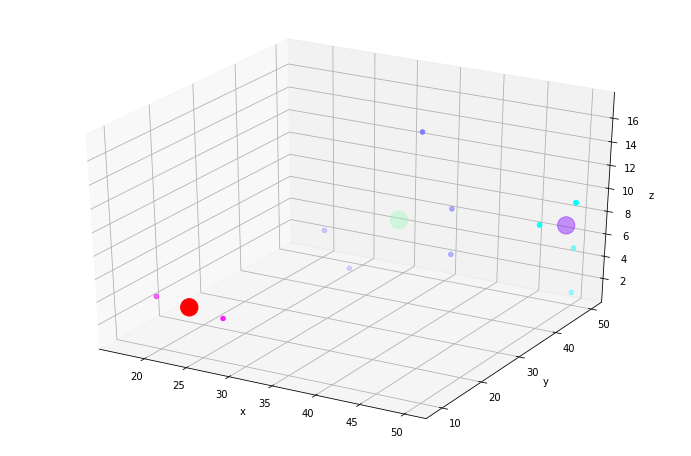

In [14]:
centers = kmn.cluster_centers_ #抓取中心
x, y, z = data["2006亚洲杯"], data["2010亚洲杯"], data["2014亚洲杯"]
plt.figure(figsize=(12,8))
ax = plt.subplot(111, projection="3d")
# 下面注释了这种绘图方式也可以
# fig = plt.figure(figsize=(12,8))
# ax = fig.add_subplot(111, projection="3d") #绘制3D
ax.scatter3D(x, y, z, c=y_new, cmap="cool")
ax.scatter3D(centers[:,0], centers[:,1], centers[:,2], c=kmn.predict(centers), s=300, cmap="rainbow")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.show()

In [8]:
country = data['国家']
country

0         中国
1         日本
2         韩国
3         伊朗
4         沙特
5        伊拉克
6        卡塔尔
7        阿联酋
8     乌兹别克斯坦
9         泰国
10        越南
11        阿曼
12        巴林
13        朝鲜
14        印尼
Name: 国家, dtype: object

In [10]:
for i in range(3):
    ind = np.argwhere(kmn.predict(x_train)==i)
    result = country[ind.ravel()]
    for i in result.index:
        print(result[i], end=" ")
    print("\n")

中国 伊拉克 卡塔尔 阿联酋 泰国 越南 阿曼 印尼 

伊朗 沙特 乌兹别克斯坦 巴林 朝鲜 

日本 韩国 

